# HW7 (total points 6)

# Use pandas API to finish problem in this notebook.
Total points 6

In [81]:
import numpy as np
import pandas as pd
import seaborn as sb

In [3]:
from io import BytesIO
from zipfile import ZipFile
import requests
import re

**Let download movie lense dataset [MovieLens](https://grouplens.org/datasets/movielens/) and extract zip file using various python packages**

http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [4]:
r = requests.get("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
print(r.status_code)
zipfile = ZipFile(BytesIO(r.content))

200


In [5]:
zipfile.extractall()

In [6]:
! ls ml-latest-small/

README.txt  links.csv  movies.csv  ratings.csv	tags.csv


In [7]:
! head  ./ml-latest-small/movies.csv

**It is a csv file.** We can use pandas read_csv to read this file into pandas DataFrame

In [50]:
# lets read movies.csv file
movie = pd.read_csv('./ml-latest-small/movies.csv')

movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Q1 (.25 point) Check if any columns is null

In [51]:
movie.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

# Q 2 (.25 point) Check datatype of columns

In [52]:
movie.dtypes

movieId     int64
title      object
genres     object
dtype: object

# Q3 (.5 point) Using *str* on  series genres, build following  unique_genere set. It should contain all the unique genres from genres column. Print unique genres too.



In [53]:
unique_genre = set(",".join(movie.genres.str.split("|").str.join(",").tolist()).split(","))
unique_genre

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

# Q 4 (1 point) build columns for different genres with value True or False based on whether a  genre is present or not in an observation?



In [54]:
for g in unique_genre:
    movie[g] = movie["genres"].str.contains(g)

movie

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,movieId,title,genres,Action,Crime,Sci-Fi,Comedy,Documentary,Fantasy,Drama,...,Mystery,Western,Horror,War,(no genres listed),Adventure,Thriller,Musical,Romance,IMAX
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,False,False,False,True,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,3,Grumpier Old Men (1995),Comedy|Romance,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,5,Father of the Bride Part II (1995),Comedy,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,6,Heat (1995),Action|Crime|Thriller,True,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
6,7,Sabrina (1995),Comedy|Romance,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,8,Tom and Huck (1995),Adventure|Children,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
8,9,Sudden Death (1995),Action,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,10,GoldenEye (1995),Action|Adventure|Thriller,True,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False


# Q5(1 point) Build year column in movie data frame. Year are embedded in title columns




Python regular expression  package **re** is very useful tool for text data handling.  This excercise is a very primitive use of it.


note
- . mean any character
- *. means "0 or more instances of the preceding regex token
- \[ matches a literal [ character
- [A-Za-z0-9] digits and lower, upper case, I think same as \w+
- '+' matches one more more times
- \d Matches any decimal digit

In [55]:
type(movie.title.str)

pandas.core.strings.StringMethods

In [65]:
movie["year"] = movie.title.str.extract(r'\((\d{4})\)')
movie

,movieId,title,genres,Action,Crime,Sci-Fi,Comedy,Documentary,Fantasy,Drama,...,Western,Horror,War,(no genres listed),Adventure,Thriller,Musical,Romance,IMAX,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,False,False,False,True,False,True,False,...,False,False,False,False,True,False,False,False,False,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,1995
4,5,Father of the Bride Part II (1995),Comedy,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,1995
5,6,Heat (1995),Action|Crime|Thriller,True,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,1995
6,7,Sabrina (1995),Comedy|Romance,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,1995
7,8,Tom and Huck (1995),Adventure|Children,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1995
8,9,Sudden Death (1995),Action,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1995
9,10,GoldenEye (1995),Action|Adventure|Thriller,True,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,1995


# Q6.(.5 point) Using seaborn, plot a bar plot of average number of movies per year. Do you see any trend?

In [98]:
movies_per_year = pd.DataFrame(movie.year.fillna(0).astype(int).value_counts().sort_index())
movies_per_year.columns = ["number"]
movies_per_year.head()

,number
0,13
1902,1
1903,1
1908,1
1915,1


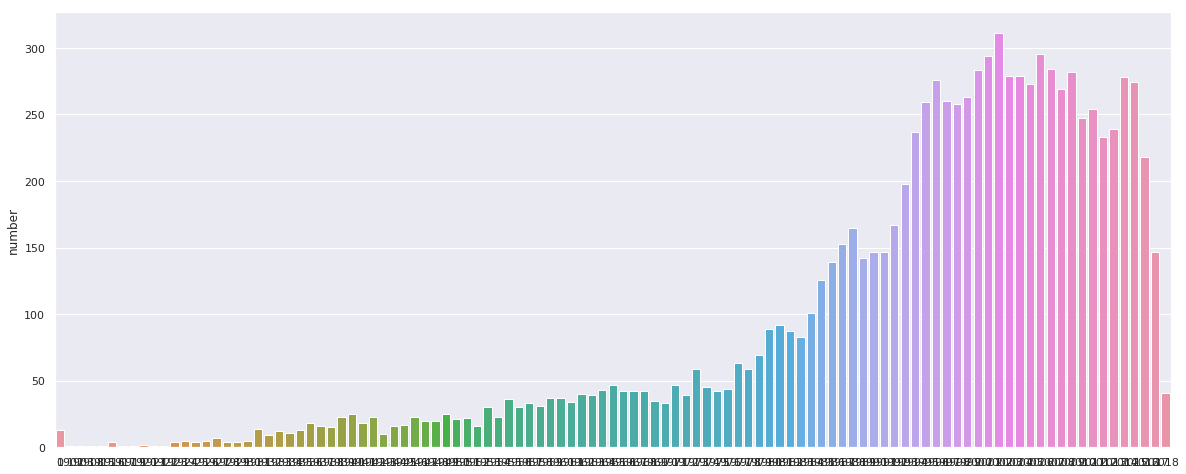

In [107]:
sb.set(rc={"figure.figsize":(20, 8)})
year_plot = sb.barplot(x=movies_per_year.index, y="number", data=movies_per_year[movies_per_year.number > 0])
year_plot.set_xlabel ="Year"
year_plot.set_ylabel = "Number of Movies"
year_plot.set_title ='Number of Movies per Year'
# year_plot.set_xticklabels(labels=movies_per_year.index, rotation=45)

# Q7.(1 point) Using matplotlib, plot total number of movies in different genres over the year. Plot should have proper title, axis labels and legends.

# Q 8 (.5 point) Build a *movie_title* column containing  the title of the movie(It should not contain year). Drop the original *title* columns. Display final movie dataFrame too.

In [3]:
 # write pandas code here

# Q 9(1 point) Using seaborn, plot average number of words in a movie name over the year in different genres. Write your observation in no more than 2 lines.

In [4]:
# Write code here.

